In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
base = automap_base()
# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)


In [6]:
# Print all of the classes mapped to the Base
base.classes.keys()



['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = base.classes.measurement
station = base.classes.station


In [8]:
# Create a session
station= Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set
date_query = "SELECT date FROM measurement ORDER BY date DESC LIMIT 1;"

with engine.connect() as connection: 
    date_query = pd.read_sql_query(date_query, connection) 
print(date_query)

         date
0  2017-08-23


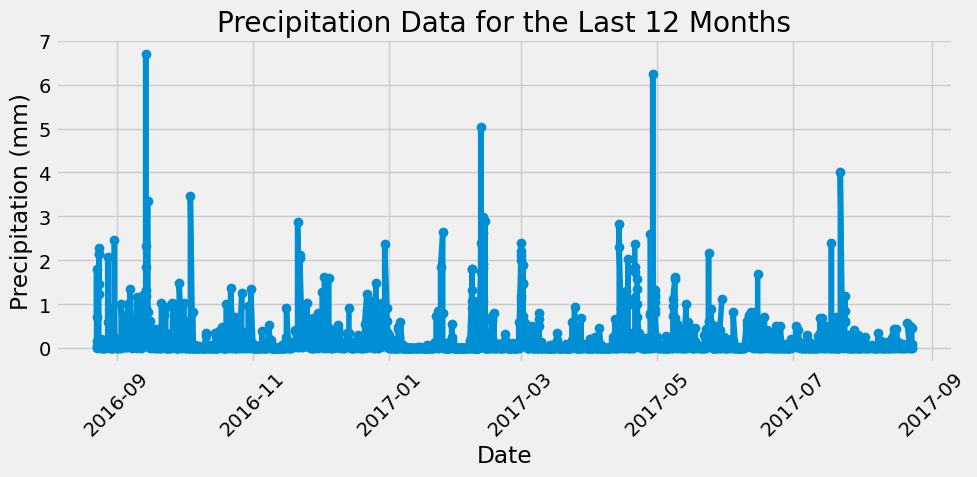

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
precip_query = """
SELECT date,prcp 
FROM measurement
WHERE date >= DATE('2017-08-23','-12 months')
ORDER BY date ASC

"""
with engine.connect() as connection: 
    df = pd.read_sql_query(precip_query, connection) 


df.sort_values(by='date', inplace= True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['prcp'], marker='o')
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df.info()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset

station_query = """
SELECT COUNT(*) AS total_stations
FROM station 
"""
with engine.connect() as connection: 
    df2 = pd.read_sql_query(station_query, connection) 
print(df2) 

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
total_query = """
SELECT s.station,s.name, COUNT(m.station) AS station_count
FROM measurement m
JOIN station s ON m.station = s.station
GROUP BY s.station
ORDER BY station_count DESC
"""

with engine.connect() as connection: 
    df3 = pd.read_sql_query(total_query, connection) 
print(df3) 






In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_query = """
SELECT s.station,s.name, COUNT(m.station) AS station_count, AVG(m.tobs) AS avg_temp, MIN(m.tobs) AS min_temp,MAX(m.tobs) as max_temp
FROM measurement m
JOIN station s ON m.station = s.station
GROUP BY s.station
ORDER BY station_count DESC
"""

with engine.connect() as connection: 
    df4 = pd.read_sql_query(temp_query, connection) 
print(df4) 


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
precip_query = """
SELECT m.tobs, m.station
FROM measurement m 
WHERE m.station = "USC00519281"
AND m.date >= DATE('2017-08-23', '-12 months')

"""
with engine.connect() as connection: 
    df5 = pd.read_sql_query(precip_query, connection) 
print(df5)




# Create the histogram

plt.hist(df5['tobs'], bins=20, color='blue', alpha=0.7,edgecolor='black')

# Add labels and title
plt.xlabel('Tempature')
plt.ylabel('Frequency')
plt.title('Tempature at Waihee,HI,USA  ')

# Show the plot
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()
